# Python Code for Project 2 -- Analysis of Avocado Sales in the United States


Below is the code used to analyze the data and answer the different research questions stated in our original proposal and our final project. 

In [5]:
#Read both databases avocado and population. Eliminate the variables that are irrelevant for the analysis. 
#CODE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

avocado = pd.read_csv('avocado_marcial.csv', parse_dates = ['Date'])
avocado = avocado.drop(columns=['Unnamed: 0'])

population = pd.read_csv('population_marcial.csv')
#avocado.describe()


In [6]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [53]:
avocado.shape

(18249, 13)

In [4]:
avocado.Date.describe()

count                   18249
unique                    169
top       2015-05-24 00:00:00
freq                      108
first     2015-01-04 00:00:00
last      2018-03-25 00:00:00
Name: Date, dtype: object

In [7]:
#We need to round sales data so that it can be expressed corrrectly. Sales should be in whole avocados
columns_to_round = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
avocado[columns_to_round] = avocado[columns_to_round].apply(lambda x: round(x))
avocado[columns_to_round] = avocado[columns_to_round].astype(np.int64)

In [8]:
#merging both databases, population and avocado 
population.head(5)

,region,year,population
0,Albany,2015,154
1,Atlanta,2015,5702
2,BaltimoreWashington,2015,2795
3,Boise,2015,674
4,Boston,2015,4776


In [9]:
avocado_percapita = pd.merge(avocado, population, how = 'left', on = ['region', 'year'])
#avocado_percapita.sort_values(by = ['Date'], ascending = True)

avocado_percapita.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,population
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,154
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,154
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,154
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,154
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,154


In [10]:
#calculate new variables

#Sales per capita
avocado_percapita['total_volume_pc'] = avocado_percapita['Total Volume'] / (avocado_percapita['population'] * 1000)
avocado_percapita['4046_pc'] = avocado_percapita['4046'] / (avocado_percapita['population'] * 1000)
avocado_percapita['4225_pc'] = avocado_percapita['4225'] / (avocado_percapita['population'] * 1000)
avocado_percapita['4770_pc'] = avocado_percapita['4770'] / (avocado_percapita['population'] * 1000)
avocado_percapita['total_bags_pc'] = avocado_percapita['Total Bags'] / (avocado_percapita['population'] * 1000)
avocado_percapita['small_bags_pc'] = avocado_percapita['Small Bags'] / (avocado_percapita['population'] * 1000)
avocado_percapita['large_bags_pc'] = avocado_percapita['Large Bags'] / (avocado_percapita['population'] * 1000)
avocado_percapita['large-bags_pc'] = avocado_percapita['XLarge Bags'] / (avocado_percapita['population'] * 1000)

#Growth rates

avocado_percapita.to_csv('avocado_percapita.csv')
avocado_percapita.head()



,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region,population,total_volume_pc,4046_pc,4225_pc,4770_pc,total_bags_pc,small_bags_pc,large_bags_pc,large-bags_pc
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,Albany,154,0.417121,0.006732,0.353603,0.000313,0.056473,0.055868,0.000606,0.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,Albany,154,0.356344,0.004378,0.289862,0.000379,0.061724,0.061091,0.000633,0.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,Albany,154,0.767664,0.005160,0.708764,0.000847,0.052892,0.052222,0.000670,0.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,Albany,154,0.512936,0.007351,0.467379,0.000471,0.037735,0.036866,0.000869,0.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,Albany,154,0.331426,0.006114,0.284665,0.000492,0.040156,0.038872,0.001284,0.0


In [11]:
#We need to round sales data so that it can be expressed corrrectly. Sales should be in whole avocados
columns_to_round = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
avocado_percapita[columns_to_round] = avocado[columns_to_round].apply(lambda x: round(x))
avocado_percapita[columns_to_round] = avocado[columns_to_round].astype(np.int64)
avocado_percapita.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region,population,total_volume_pc,4046_pc,4225_pc,4770_pc,total_bags_pc,small_bags_pc,large_bags_pc,large-bags_pc
0,2015-12-27,1.33,64236,1036,54454,48,8696,8603,93,0,...,Albany,154,0.417121,0.006732,0.353603,0.000313,0.056473,0.055868,0.000606,0.0
1,2015-12-20,1.35,54876,674,44638,58,9505,9408,97,0,...,Albany,154,0.356344,0.004378,0.289862,0.000379,0.061724,0.061091,0.000633,0.0
2,2015-12-13,0.93,118220,794,109149,130,8145,8042,103,0,...,Albany,154,0.767664,0.005160,0.708764,0.000847,0.052892,0.052222,0.000670,0.0


In [54]:
avocado_percapita.shape

(18249, 22)

In [17]:
avocado_percapita.columns = avocado_percapita.columns.str.replace('\.*\s+', '_').str.lower()

In [18]:
avocado_percapita.head()

,date,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,...,region,population,total_volume_pc,4046_pc,4225_pc,4770_pc,total_bags_pc,small_bags_pc,large_bags_pc,large-bags_pc
0,2015-12-27,1.33,64237,1037,54455,48,8697,8604,93,0,...,Albany,154,0.417123,0.006734,0.353604,0.000312,0.056474,0.055870,0.000604,0.0
1,2015-12-20,1.35,54877,674,44639,58,9506,9408,97,0,...,Albany,154,0.356344,0.004377,0.289864,0.000377,0.061727,0.061091,0.000630,0.0
2,2015-12-13,0.93,118220,795,109150,130,8145,8042,103,0,...,Albany,154,0.767662,0.005162,0.708766,0.000844,0.052890,0.052221,0.000669,0.0
3,2015-12-06,1.08,78992,1132,71976,73,5811,5677,134,0,...,Albany,154,0.512935,0.007351,0.467377,0.000474,0.037734,0.036864,0.000870,0.0
4,2015-11-29,1.28,51040,941,43838,76,6184,5986,198,0,...,Albany,154,0.331429,0.006110,0.284662,0.000494,0.040156,0.038870,0.001286,0.0


In [94]:
#price_by_region = avocado_percapita.averageprice.groupby(avocado_percapita.region)
#price_by_region

In [89]:
#price_by_region.get_group('TotalUS')

In [91]:
#price_by_region.mean().sort_values()

In [90]:
#price_by_region.min()

In [80]:
#price_by_year_region = avocado_percapita.averageprice.groupby([avocado_percapita.region, avocado_percapita.year])

In [93]:
#price_by_year_region.mean().unstack().plot(kind = 'bar')
#price_by_year_region.mean().unstack()

In [19]:
###Average price and average sales per capita by city######

by_city_year = avocado_percapita.groupby(['region', 'year'])['averageprice', 'total_volume_pc'].mean()
by_city_year = by_city_year.drop(index = ['California','GreatLakes', 'Midsouth',
                           'Northeast','NorthernNewEngland','Plains','SouthCentral', 'Southeast', 'West'])
by_city_year
#by_city_2017 = by_city_year.drop(columns = ['2015','2016','2018'])

averageprice  total_volume_pc
region              year                               
Albany              2015      1.538750         0.251617
                    2016      1.533942         0.333017
                    2017      1.637830         0.326851
                    2018      1.435833         0.419931
Atlanta             2015      1.380577         0.039176
                    2016      1.214135         0.046993
                    2017      1.428774         0.046192
                    2018      1.288750         0.057857
BaltimoreWashington 2015      1.368846         0.139829
                    2016      1.587596         0.140382
                    2017      1.679434         0.137799
                    2018      1.378333         0.179081
Boise               2015      1.373750         0.053988
                    2016      1.141923         0.064754
                    2017      1.492642         0.063255
                    2018      1.492500         0.070790
Boston              2015      1.473558         0.055274
                    2016      1.426154         0.061164
                    2017      1.679528         0.059702
                    2018      1.576667         0.073866
BuffaloRochester    2015      1.544615         0.049838
                    2016      1.483846         0.061040
                    2017      1.587736         0.064223
                    2018      1.226250         0.077286
Charlotte           2015      1.575769         0.037634
                    2016      1.497885         0.041113
                    2017      1.769811         0.044445
                    2018      1.482500         0.058731
Chicago             2015      1.404038         0.041744
                    2016      1.547308         0.039901
...                                ...              ...
Seattle             2017      1.599340         0.085454
                    2018      1.455000         0.084950
SouthCarolina       2015      1.454712         0.031932
                    2016      1.305000         0.036257
                    2017      1.479811         0.037497
                    2018      1.268333         0.048048
Spokane             2015      1.400385         0.073642
                    2016      1.333558         0.086732
                    2017      1.604528         0.086169
                    2018      1.425000         0.089928
StLouis             2015      1.503365         0.033921
                    2016      1.185481         0.036463
                    2017      1.591792         0.030208
                    2018      1.465833         0.037389
Syracuse            2015      1.529038         0.039836
                    2016      1.503462         0.050190
                    2017      1.589434         0.053752
                    2018      1.250417         0.066098
Tampa               2015      1.356635         0.055389
                    2016      1.264519         0.068643
                    2017      1.619340         0.062721
                    2018      1.330833         0.088874
TotalUS             2015      1.257404         0.049636
                    2016      1.263558         0.054087
                    2017      1.436604         0.054008
                    2018      1.307083         0.066519
WestTexNewMexico    2015      1.259320         0.384314
                    2016      1.246635         0.399266
                    2017      1.281538         0.429877
                    2018      1.251250         0.460394

[180 rows x 2 columns]

In [20]:
by_city = by_city_year.averageprice.reset_index()
by_city_excl_2018 = by_city [by_city.year != 2018]
by_city_excl_2018 = by_city_excl_2018.groupby(['region', 'year']).mean().unstack()
by_city_excl_2018

averageprice                    
year                        2015      2016      2017
region                                              
Albany                  1.538750  1.533942  1.637830
Atlanta                 1.380577  1.214135  1.428774
BaltimoreWashington     1.368846  1.587596  1.679434
Boise                   1.373750  1.141923  1.492642
Boston                  1.473558  1.426154  1.679528
BuffaloRochester        1.544615  1.483846  1.587736
Charlotte               1.575769  1.497885  1.769811
Chicago                 1.404038  1.547308  1.714811
CincinnatiDayton        1.202308  1.088365  1.319434
Columbus                1.273846  1.186346  1.315660
DallasFtWorth           1.077885  0.996154  1.176981
Denver                  1.187788  1.093173  1.357736
Detroit                 1.338269  1.172404  1.339057
GrandRapids             1.416346  1.509327  1.627736
HarrisburgScranton      1.471635  1.511635  1.595755
HartfordSpringfield     1.747788  1.851058  1.888302
Houston                 1.048077  0.991923  1.104057
Indianapolis            1.342981  1.301538  1.330755
Jacksonville            1.503077  1.367692  1.671509
LasVegas                1.368846  1.352404  1.417830
LosAngeles              1.152500  1.083750  1.377358
Louisville              1.294423  1.211538  1.357075
MiamiFtLauderdale       1.383558  1.279808  1.637547
Nashville               1.277212  1.116154  1.240000
NewOrleansMobile        1.267692  1.248654  1.419057
NewYork                 1.644519  1.762019  1.809906
Orlando                 1.499327  1.370769  1.680189
Philadelphia            1.555192  1.674808  1.707264
PhoenixTucson           1.157115  1.258750  1.272547
Pittsburgh              1.407212  1.343365  1.362925
Portland                1.306827  1.191635  1.434340
RaleighGreensboro       1.449423  1.447788  1.768679
RichmondNorfolk         1.274519  1.211154  1.399245
Roanoke                 1.227115  1.147500  1.358302
Sacramento              1.454038  1.668173  1.774057
SanDiego                1.274231  1.313750  1.584528
SanFrancisco            1.621058  1.881250  1.965943
Seattle                 1.422212  1.300288  1.599340
SouthCarolina           1.454712  1.305000  1.479811
Spokane                 1.400385  1.333558  1.604528
StLouis                 1.503365  1.185481  1.591792
Syracuse                1.529038  1.503462  1.589434
Tampa                   1.356635  1.264519  1.619340
TotalUS                 1.257404  1.263558  1.436604
WestTexNewMexico        1.259320  1.246635  1.281538

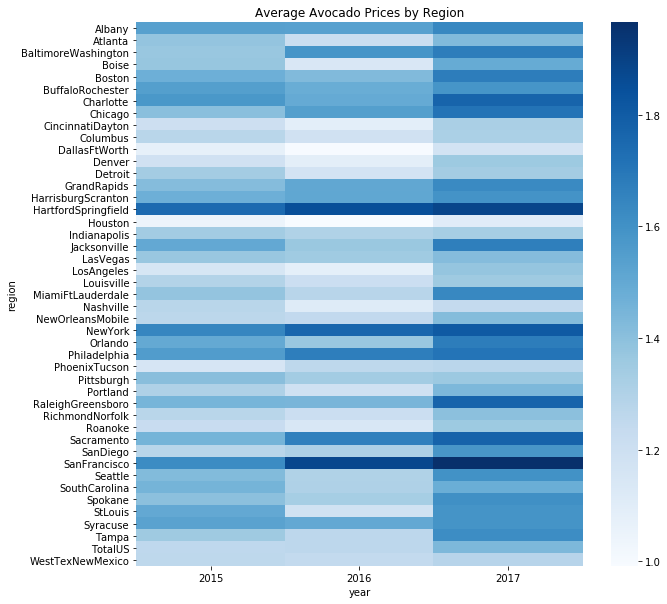

In [22]:
###Evolution of prices over time.
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
heatmap_prices = sns.heatmap(by_city_excl_2018.averageprice, square = False, 
                             annot = False, cmap = 'Blues', alpha = 1.0)
heatmap_prices
#heatmap_prices.set_xlabel('Years')
#heatmap_prices.set_ylabel('Units')
heatmap_prices.set_title('Average Avocado Prices by Region')

pass

In [43]:
by_city_vol = by_city_year.total_volume_pc.reset_index()
by_city_vol_excl_2018 = by_city_vol[by_city.year != 2018]
by_city_vol_2018 = by_city_vol_excl_2018.groupby(['region', 'year']).mean().unstack()
by_city_vol_2018

total_volume_pc                    
year                           2015      2016      2017
region                                                 
Albany                     0.251617  0.333017  0.326851
Atlanta                    0.039176  0.046993  0.046192
BaltimoreWashington        0.139829  0.140382  0.137799
Boise                      0.053988  0.064754  0.063255
Boston                     0.055274  0.061164  0.059702
BuffaloRochester           0.049838  0.061040  0.064223
Charlotte                  0.037634  0.041113  0.044445
Chicago                    0.041744  0.039901  0.040555
CincinnatiDayton           0.052431  0.062242  0.065577
Columbus                   0.037310  0.042555  0.046467
DallasFtWorth              0.081667  0.084442  0.084448
Denver                     0.134247  0.152753  0.139024
Detroit                    0.040186  0.042221  0.044867
GrandRapids                0.090147  0.083842  0.077988
HarrisburgScranton         0.198058  0.222184  0.216789
HartfordSpringfield        0.120190  0.124745  0.119465
Houston                    0.079918  0.083035  0.094577
Indianapolis               0.039628  0.043928  0.046501
Jacksonville               0.047721  0.063225  0.057627
LasVegas                   0.070828  0.075367  0.074623
LosAngeles                 0.107287  0.117698  0.111959
Louisville                 0.032269  0.037985  0.038349
MiamiFtLauderdale          0.040157  0.050203  0.047300
Nashville                  0.045512  0.054015  0.064142
NewOrleansMobile           0.096339  0.110757  0.105921
NewYork                    0.033583  0.033931  0.034749
Orlando                    0.059195  0.075319  0.070704
Philadelphia               0.033111  0.034981  0.034466
PhoenixTucson              0.120617  0.122615  0.121824
Pittsburgh                 0.018584  0.022647  0.027694
Portland                   0.112799  0.148066  0.141911
RaleighGreensboro          0.096814  0.107338  0.113269
RichmondNorfolk            0.088212  0.097039  0.099493
Roanoke                    0.208246  0.236140  0.242928
Sacramento                 0.093230  0.096879  0.094106
SanDiego                   0.077700  0.085046  0.076857
SanFrancisco               0.081427  0.084980  0.083566
Seattle                    0.074925  0.094026  0.085454
SouthCarolina              0.031932  0.036257  0.037497
Spokane                    0.073642  0.086732  0.086169
StLouis                    0.033921  0.036463  0.030208
Syracuse                   0.039836  0.050190  0.053752
Tampa                      0.055389  0.068643  0.062721
TotalUS                    0.049636  0.054087  0.054008
WestTexNewMexico           0.384314  0.399266  0.429877

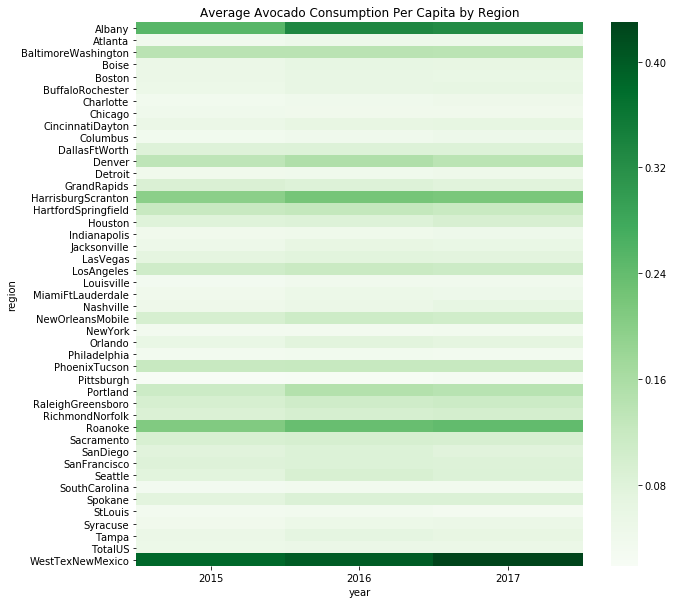

In [44]:
###Evolution of prices over time.
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
heatmap_prices = sns.heatmap(by_city_vol_2018.total_volume_pc, square = False, 
                             annot = False, cmap = 'Greens', alpha = 1.0)
heatmap_prices
#heatmap_prices.set_xlabel('Years')
#heatmap_prices.set_ylabel('Units')
heatmap_prices.set_title('Average Avocado Consumption Per Capita by Region')

pass

In [45]:
by_city_excl_2017 = by_city[by_city.year == 2017]
by_city_excl_2017
#by_city_excl_2017.min()
#by_city_excl_2017.averageprice.plot(kind = 'bar')

,region,year,averageprice
2,Albany,2017,1.637830
6,Atlanta,2017,1.428774
10,BaltimoreWashington,2017,1.679434
14,Boise,2017,1.492642
18,Boston,2017,1.679528
22,BuffaloRochester,2017,1.587736
26,Charlotte,2017,1.769811
30,Chicago,2017,1.714811
34,CincinnatiDayton,2017,1.319434
38,Columbus,2017,1.315660


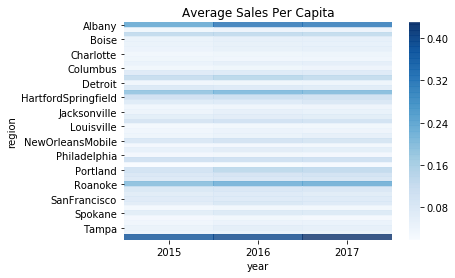

In [46]:
sales_by_city = by_city_year.total_volume_pc.reset_index()
sales_by_city_excl_2018 = sales_by_city[sales_by_city.year != 2018]
sales_by_city_excl_2018 = sales_by_city_excl_2018.groupby(['region', 'year']).mean().unstack()
#sales_by_city_excl_2018

import seaborn as sns
heatmap_sales = sns.heatmap(sales_by_city_excl_2018.total_volume_pc, square = False, annot = False, cmap = "Blues", alpha = .8)
heatmap_sales
#heatmap_prices.set_xlabel('Years')
#heatmap_prices.set_ylabel('Units')
heatmap_sales.set_title('Average Sales Per Capita')

pass

In [304]:
#avo.pivot_table(values = 'AveragePrice', index = 'region', columns = 'year')

In [47]:
sales_by_city_excl_2017 = sales_by_city[sales_by_city.year == 2017]
sales_by_city_excl_2017.total_volume_pc.max()
sales_by_city_excl_2017.total_volume_pc.min()

0.027693806662407304

In [102]:
#by_region.get_group(avocado_percapita.region[0])

In [38]:
#avocado_percapita.groupby('region').groups


In [107]:
#avo_US = avocado_percapita.groupby(['region'])
#avo_US.get_group('TotalUS')['type']

In [57]:
avocados_price = avocado.groupby(['region', 'year']).mean()
avocados_price.head()
us_avocados_price = avocados_price.loc[['TotalUS'], ['AveragePrice']].reset_index()
us_avocados_price

,region,year,AveragePrice
0,TotalUS,2015,1.257404
1,TotalUS,2016,1.263558
2,TotalUS,2017,1.436604
3,TotalUS,2018,1.307083


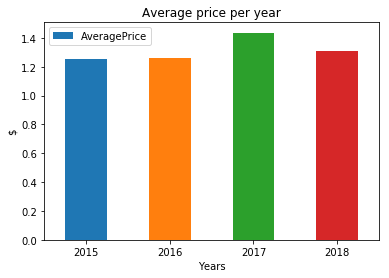

In [58]:
bar_chart = us_avocados_price.plot.bar(x = 'year', y = 'AveragePrice', rot=0)
bar_chart.set_xlabel('Years')
bar_chart.set_ylabel('$')
bar_chart.set_title('Average price per year')
pass

In [119]:
avocados_type = avocado.groupby(['region', 'year', 'type']).sum()
avocados_type.head()
us_avocados_type = avocados_type.loc[['TotalUS', 'Houston', 'DallasFtWorth','PhoenixTucson', 'Sacramento','SanFrancisco'], ['Total Volume']].unstack()
us_avocados_type.reset_index()
us_avocados_type['Share of Total'] = us_avocados_type['Total Volume']['organic'] / us_avocados_type['Total Volume']['conventional'] * 100 
us_avocados_type

Total Volume           Share of Total
type               conventional   organic               
region        year                                      
DallasFtWorth 2015     59700612    610699       1.022936
              2016     62397618   1297630       2.079615
              2017     64967400   1273587       1.960348
              2018     17844302    327442       1.834995
Houston       2015     54824008    563468       1.027776
              2016     57456716   1248072       2.172195
              2017     67310154   1782942       2.648846
              2018     19612059    370459       1.888935
PhoenixTucson 2015     56612329    563959       0.996177
              2016     58689327    594357       1.012717
              2017     60476062    694473       1.148344
              2018     17822080    190724       1.070156
Sacramento    2015     21476496    504044       2.346956
              2016     22737970    385064       1.693485
              2017     22837656    354766       1.553426
              2018      6760535    107214       1.585880
SanFrancisco  2015     38270024   1175780       3.072326
              2016     40291720   1237903       3.072351
              2017     40825131   1046374       2.563063
              2018     12657378    325880       2.574625
TotalUS       2015   1623685919  33569308       2.067475
              2016   1770259390  48899756       2.762293
              2017   1801769881  62923679       3.492326
              2018    505506401  18125854       3.585682

In [123]:
avocados_type = avocado.groupby(['region', 'year', 'type']).sum()
avocados_type.head()
us_avocados_type = avocados_type.loc[['TotalUS', 'Denver', 'LosAngeles','NewOrleansMobile', 'SanDiego','Seattle'], ['Total Volume']].unstack()
us_avocados_type.reset_index()
us_avocados_type['Share of Total'] = us_avocados_type['Total Volume']['organic'] / us_avocados_type['Total Volume']['conventional'] * 100 
us_avocados_type

Total Volume           Share of Total
type                  conventional   organic               
region           year                                      
Denver           2015     37304261   1886087       5.055956
                 2016     43312418   1995343       4.606861
                 2017     40706657   1852421       4.550659
                 2018     11497064    348287       3.029356
LosAngeles       2015    145907712   2312984       1.585238
                 2016    158251221   4891084       3.090709
                 2017    153530502   4950676       3.224555
                 2018     36820838   1231540       3.344682
NewOrleansMobile 2015     12534700    129605       1.033970
                 2016     14463528    176835       1.222627
                 2017     14095480    231014       1.638923
                 2018      3973778     90182       2.269427
SanDiego         2015     26014335    571390       2.196443
                 2016     28540090    797967       2.795951
                 2017     26403983    790308       2.993139
                 2018      6437661    236190       3.668879
Seattle          2015     27191732   1865370       6.860063
                 2016     35095435   2092981       5.963684
                 2017     32566592   2460975       7.556747
                 2018      6996900    944194      13.494462
TotalUS          2015   1623685919  33569308       2.067475
                 2016   1770259390  48899756       2.762293
                 2017   1801769881  62923679       3.492326
                 2018    505506401  18125854       3.585682

[1657255305.49, 1819158753.79, 1864693682.17]


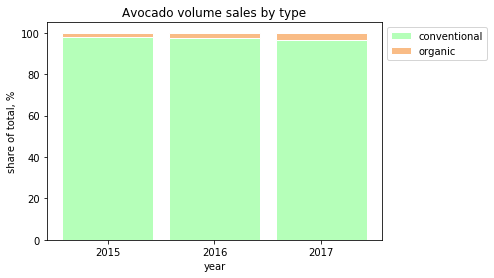

In [89]:
# Data
r = [0,1,2]
raw_data = {'conventional': [1.623686e+09, 1.770259e+09, 1.801770e+09], 'organic': [33569305.49, 48899753.79, 62923682.17]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df['conventional'], df['organic'])]
print(totals)
conventional = [i / j * 100 for i,j in zip(df['conventional'], totals)]
#print(yr_2015)
organic = [i / j * 100 for i,j in zip(df['organic'], totals)]
#yr_2017 = [i / j * 100 for i,j in zip(df['2017'], totals)]

# plot
barWidth = 0.85
names = ('2015','2016','2017')
#Create year Bars
plt.bar(r, conventional, color ='#b5ffb9', edgecolor='white', width=barWidth, label = 'conventional')
# Create orange Bars
plt.bar(r, organic, bottom = conventional, color='#f9bc86', edgecolor='white', width=barWidth, label = 'organic')
# Create blue Bars
#plt.bar(r, yr_2017 , bottom = [i+j for i,j in zip(yr_2015, yr_2016)], color='#a3acff', edgecolor='white', width=barWidth)
 
#Custom x axis
plt.xticks(r, names)
plt.xlabel("year")
plt.ylabel("share of total, %")
plt.title("Avocado volume sales by type")
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

#Show graphic
plt.show()
